The following dataset contain information about Telecom_Customer_Support_Tickets_ it has column -Ticket_ID,Created_Date,Region,City,Issue_Category,	Priority,Resolution_Time_Hours,Customer_Type,Satisfaction_Score

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  

TASK-1: NOTEBOOK STRUCTURE AND LOADING

In [153]:
df=pd.read_csv("Downloads/hackathon/Telecom_Customer_Support_Tickets_Gigantic_Dataset - Telecom_Customer_Support_Tickets_Gigantic_Dataset.csv.csv")

In [154]:
df.describe()

,Ticket_ID,Resolution_Time_Hours,Satisfaction_Score
count,62500.000000,62222.000000,56269.000000
mean,530003.994160,119.250201,3.220548
std,17317.636308,68.837770,1.226304
min,500000.000000,1.000000,1.000000
25%,515004.750000,60.000000,2.000000
50%,530018.500000,119.000000,3.000000
75%,544988.000000,179.000000,4.000000
max,559999.000000,239.000000,5.000000


In [46]:
df.head()

,Ticket_ID,Created_Date,Region,City,Issue_Category,Priority,Resolution_Time_Hours,Customer_Type,Satisfaction_Score
0,500000,2022-07-27,NaN,Pune,Billing,Medium,36.0,Existing,5.0
1,500001,2024-04-04,NaN,Chennai,NaN,Medium,10.0,Existing,2.0
2,500002,2024-02-12,Central,Ahmedabad,Network,High,41.0,New,2.0
3,500003,2022-02-18,Central,Bengaluru,Service,Low,206.0,New,4.0
4,500004,2023-01-04,Central,Chennai,Hardware,Critical,31.0,Existing,5.0


In [45]:
df.tail()

,Ticket_ID,Created_Date,Region,City,Issue_Category,Priority,Resolution_Time_Hours,Customer_Type,Satisfaction_Score
62495,501126,2023-01-02,West,Hyderabad,Service,Low,218.0,Existing,4.0
62496,506196,2024-01-11,West,NaN,Hardware,Medium,10.0,NaN,NaN
62497,516269,2022-06-11,Central,Kolkata,Billing,Low,92.0,New,1.0
62498,542189,2022-05-25,South,Pune,NaN,Low,100.0,New,3.0
62499,534990,2022-03-05,West,Mumbai,Billing,Medium,19.0,Existing,5.0


In [49]:
df.info

<bound method DataFrame.info of        Ticket_ID Created_Date   Region       City Issue_Category  Priority  \
0         500000   2022-07-27      NaN       Pune        Billing    Medium   
1         500001   2024-04-04      NaN    Chennai            NaN    Medium   
2         500002   2024-02-12  Central  Ahmedabad        Network      High   
3         500003   2022-02-18  Central  Bengaluru        Service       Low   
4         500004   2023-01-04  Central    Chennai       Hardware  Critical   
...          ...          ...      ...        ...            ...       ...   
62495     501126   2023-01-02     West  Hyderabad        Service       Low   
62496     506196   2024-01-11     West        NaN       Hardware    Medium   
62497     516269   2022-06-11  Central    Kolkata        Billing       Low   
62498     542189   2022-05-25    South       Pune            NaN       Low   
62499     534990   2022-03-05     West     Mumbai        Billing    Medium   

       Resolution_Time_Hours Cu

In [51]:
df.shape

(62500, 9)

TASK-2: DATA CLEANING AND EDA

In [155]:
#null values
df.isnull().values.any()

np.True_

In [157]:
df.isnull().sum

<bound method DataFrame.sum of        Ticket_ID  Created_Date  Region   City  Issue_Category  Priority  \
0          False         False    True  False           False     False   
1          False         False    True  False            True     False   
2          False         False   False  False           False     False   
3          False         False   False  False           False     False   
4          False         False   False  False           False     False   
...          ...           ...     ...    ...             ...       ...   
62495      False         False   False  False           False     False   
62496      False         False   False   True           False     False   
62497      False         False   False  False           False     False   
62498      False         False   False  False            True     False   
62499      False         False   False  False           False     False   

       Resolution_Time_Hours  Customer_Type  Satisfaction_Score  
0 

DataType Validation

In [170]:
df.dtypes

Ticket_ID                  int64
Created_Date              object
Region                    object
City                      object
Issue_Category            object
Priority                  object
Resolution_Time_Hours    float64
Customer_Type             object
Satisfaction_Score       float64
dtype: object

Detect and Handle Duplicate Values

In [164]:
duplicates_value=df.duplicated().sum()

In [162]:
df.drop_duplicates()

,Ticket_ID,Created_Date,Region,City,Issue_Category,Priority,Resolution_Time_Hours,Customer_Type,Satisfaction_Score
0,500000,2022-07-27,NaN,Pune,Billing,Medium,36.0,Existing,5.0
1,500001,2024-04-04,NaN,Chennai,NaN,Medium,10.0,Existing,2.0
2,500002,2024-02-12,Central,Ahmedabad,Network,High,41.0,New,2.0
3,500003,2022-02-18,Central,Bengaluru,Service,Low,206.0,New,4.0
4,500004,2023-01-04,Central,Chennai,Hardware,Critical,31.0,Existing,5.0
...,...,...,...,...,...,...,...,...,...
59995,559995,2023-09-14,South,NaN,Hardware,Critical,147.0,New,2.0
59996,559996,2022-08-30,East,Kolkata,Software,Low,177.0,NaN,3.0
59997,559997,2023-05-30,South,Delhi,Service,Low,144.0,New,5.0
59998,559998,2022-12-11,South,Bengaluru,Hardware,Critical,104.0,New,NaN


Statistics

In [109]:
skewness = df['Resolution_Time_Hours'].skew()
kurtosis = df['Resolution_Time_Hours'].kurtosis()

print(f"Skewness- {skewness:.2f}, Kurtosis- {kurtosis:.2f}")

Skewness- 0.02, Kurtosis- -1.20


In [112]:
Mean = df['Satisfaction_Score'].mean()
Median = df['Satisfaction_Score'].median()
Mode = df['Satisfaction_Score'].mode()

print('Mean:-',Mean,'Median:-',Median,'Mode:-',Mode)

Mean:- 3.220547726101406 Median:- 3.0 Mode:- 0    4.0
Name: Satisfaction_Score, dtype: float64


Here We Observed that Mean, Median, and Mode are pretty much similar that signifies that the data is normal and is follows the Guassian Normal Distribution.
But We also show that the data is Kurtosis so to make it normal we have to perform some operations.

In [171]:
df.describe()

,Ticket_ID,Resolution_Time_Hours,Satisfaction_Score
count,62500.000000,62222.000000,56269.000000
mean,530003.994160,119.250201,3.220548
std,17317.636308,68.837770,1.226304
min,500000.000000,1.000000,1.000000
25%,515004.750000,60.000000,2.000000
50%,530018.500000,119.000000,3.000000
75%,544988.000000,179.000000,4.000000
max,559999.000000,239.000000,5.000000


Task-3 Business/ Operational Data Analysis

In [174]:
issue_count = df.groupby('Issue_Category')['Ticket_ID'].count()
issue_count

Issue_Category
Billing     11344
Hardware    11079
Network     11311
Service     11178
Software    11278
Name: Ticket_ID, dtype: int64

Shows the Category wise Ticket count and it shows that every category is quit equal 

In [175]:
priority_resolution = df.groupby('Priority')['Resolution_Time_Hours'].count()
priority_resolution

Priority
Critical     6238
High        12432
Low         21910
Medium      21642
Name: Resolution_Time_Hours, dtype: int64

Here shows Resolution time according to Their Priority and Critical is it's loweset

In [ ]:
Region-wise Service Performance

In [176]:
region_performance = df.groupby("Region")["Resolution_Time_Hours"].mean()
region_performance

Region
Central    120.050115
East       119.965968
North      118.082931
South      117.984990
West       120.552009
Name: Resolution_Time_Hours, dtype: float64

Priority-wise Average Resolution Time

In [177]:
priority_resolution = df.groupby("Priority")["Resolution_Time_Hours"].mean()
priority_resolution

Priority
Critical    118.521321
High        119.617278
Low         119.268827
Medium      119.230570
Name: Resolution_Time_Hours, dtype: float64

Customer Type vs Satisfaction

In [178]:
customer_satisfaction = df.groupby("Customer_Type")["Satisfaction_Score"].mean()
customer_satisfaction

Customer_Type
Existing    3.211957
New         3.218631
Name: Satisfaction_Score, dtype: float64

TASK 4- Data visualization

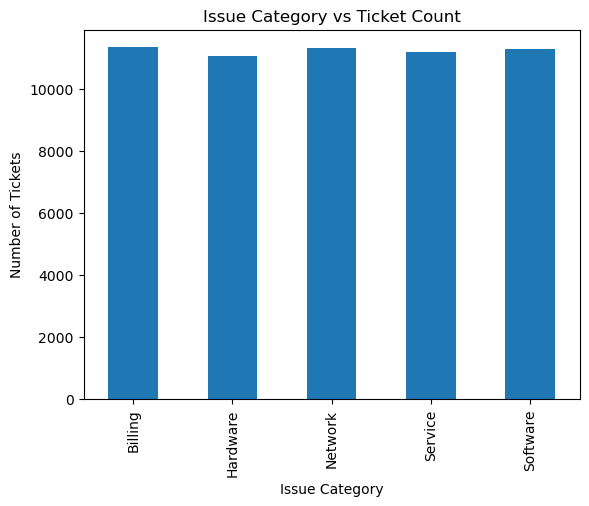

In [181]:
issue_count.plot(kind="bar")
plt.title("Issue Category vs Ticket Count")
plt.xlabel("Issue Category")
plt.ylabel("Number of Tickets")
plt.show()

TASK 5-Final Insight

Summary
Through this analysis we realised that High priority tickets take significantly longer to resolve.